In [2]:
import numpy as np 
import pandas as pad
import matplotlib.pyplot as plb
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pad.read_csv('Salary_dataset.csv')
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [4]:
#Check for null Columns
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [5]:
#Summary Statistics
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


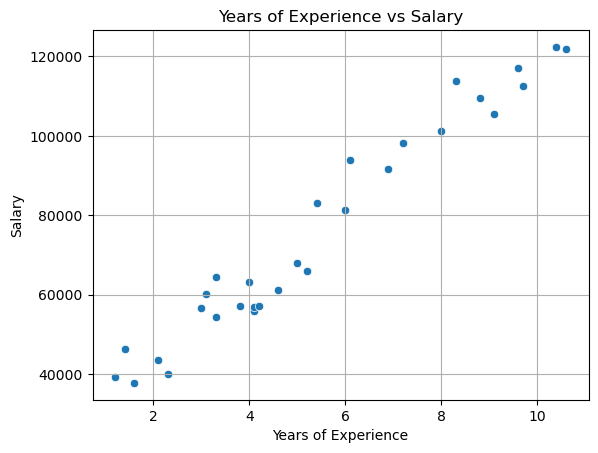

In [6]:
# Scatter plot of YearsExperience vs Salary
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plb.title("Years of Experience vs Salary")
plb.xlabel("Years of Experience")
plb.ylabel("Salary")
plb.grid(True)
plb.show()

In [7]:
#Correlation Matrix
print(df.corr())

                 Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000


In [8]:
X = df[['YearsExperience']]
y = df['Salary']

In [9]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Check Train Test Data Size
print('Train Size: ',len(X_train),'\t','Test Size: ',len(X_test))

Train Size:  24 	 Test Size:  6


In [11]:
# Create the model
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Intercept and coefficient
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")

Intercept (b0): 24380.201479473704
Slope (b1): 9423.815323030976


In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pad.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual      Predicted
27  112636.0  115791.210113
15   67939.0   71499.278095
23  113813.0  102597.868661
17   83089.0   75268.804224
8    64446.0   55478.792045
9    57190.0   60190.699707


# Evaluate Model

In [15]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 6286.453830757745
Mean Squared Error (MSE): 49830096.855908394
Root Mean Squared Error (RMSE): 7059.04362190151
R-squared (R²): 0.9024461774180497


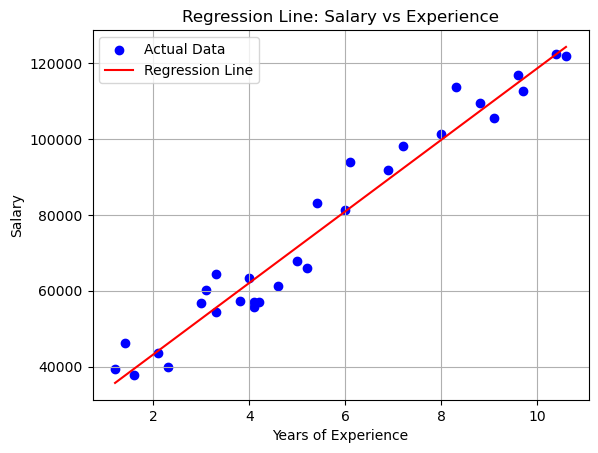

In [16]:
# Plot regression line with data
plb.scatter(X, y, color='blue', label='Actual Data')
plb.plot(X, model.predict(X), color='red', label='Regression Line')
plb.title('Regression Line: Salary vs Experience')
plb.xlabel('Years of Experience')
plb.ylabel('Salary')
plb.legend()
plb.grid(True)
plb.show()

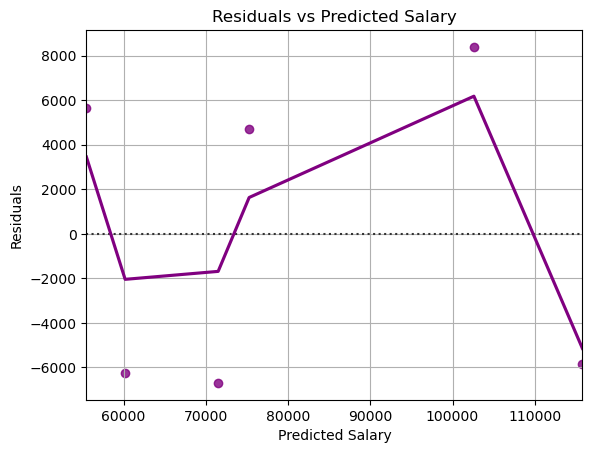

In [17]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple")
plb.xlabel("Predicted Salary")
plb.ylabel("Residuals")
plb.title("Residuals vs Predicted Salary")
plb.grid(True)
plb.show()